# Hyperopt test
## How to use hyperopt to optimize hyperparameters
### @author: FlorentPajot
### @version: 1.0
### @date: 15/04/2016

In [4]:
import pymango
from hyperopt import fmin, tpe, hp
best = fmin( # fonction de minimization
    fn=lambda x: x, # fonction à miinimizer
    space=hp.uniform('x', 0, 1), # le search space avec hp pour définir un segment pour la variable x
    algo=tpe.suggest, # l'algo de recherche, ici tpe qui signifie tree of Parzen Estimators, ça aurait pu être hypertopt.random
    max_evals=100) # le nombre max d'itérations
print best

{'x': 0.000269455723739237}


In [6]:
best = fmin(
    fn=lambda x: (x-1)**2,
    space=hp.uniform('x', -2, 2),
    algo=tpe.suggest,
    max_evals=1000)
print best # on s'attend à trouver 1

{'x': 0.9994688845461694}


In [9]:
# Méthode visiblement pas adaptée aux fonctions avec beaucoup de minimum locaux
import math
from __future__ import division
best = fmin(
    fn=lambda x: math.sin(x)/x,
    space=hp.uniform('x', -5, 5),
    algo=tpe.suggest,
    max_evals=1000)
print best # on s'attend à trouver 0, il faut mettre beaucoup d'itérations pour ne pas tomber dans un minimum local

{'x': 4.493106844780035}


In [11]:
# Optimiser le search space avec hp.choice(label, options) hp.normal(label, mu, sigma) et hp;uniforme(label, low, high)
import hyperopt.pyll.stochastic

space = {
    'x': hp.uniform('x', 0, 1), # on pioche x de manière uniforme sur le segment [0,1]
    'y': hp.normal('y', 0, 1), # on pioche y parmi 
    'name': hp.choice('name', ['alice', 'bob']), # on pioche name parmi un liste de catégories
}

print hyperopt.pyll.stochastic.sample(space)

{'y': 0.22453883206599157, 'x': 0.19836288166957772, 'name': 'bob'}


In [12]:
from hyperopt import hp
space = hp.choice('a', # on va piocher a dans l'un ou l'autre des espaces suivants
    [
        ('case 1', 1 + hp.lognormal('c1', 0, 1)),
        ('case 2', hp.uniform('c2', -10, 10))
    ])
print space
print hyperopt.pyll.stochastic.sample(space) # la méthode "sample" permet d'évaluer un exemple d'hypers paramètres

0 switch
1   hyperopt_param
2     Literal{a}
3     randint
4       Literal{2}
5   pos_args
6     Literal{case 1}
7     add
8       Literal{1}
9       float
10         hyperopt_param
11           Literal{c1}
12           lognormal
13             Literal{0}
14             Literal{1}
15   pos_args
16     Literal{case 2}
17     float
18       hyperopt_param
19         Literal{c2}
20         uniform
21           Literal{-10}
22           Literal{10}
('case 2', 9.046821176190303)


In [21]:
# Pour voir ce qu'il se passe dans hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}

trials = Trials() #Permet de stocker les états intermédiaire de fmin
best = fmin(fn=f, space=fspace, algo=tpe.suggest, max_evals=500, trials=trials)

print 'best:', best

print 'trials:'
for trial in trials.trials[:2]:
    print trial

best: {'x': -0.0014282194975243833}
trials:
{'refresh_time': None, 'book_time': None, 'misc': {'tid': 0, 'idxs': {'x': [0]}, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'vals': {'x': [1.9646918559786162]}, 'workdir': None}, 'state': 2, 'tid': 0, 'exp_key': None, 'version': 0, 'result': {'status': 'ok', 'loss': 3.8600140889486996}, 'owner': None, 'spec': None}
{'refresh_time': None, 'book_time': None, 'misc': {'tid': 1, 'idxs': {'x': [1]}, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'vals': {'x': [-3.9393509404526728]}, 'workdir': None}, 'state': 2, 'tid': 1, 'exp_key': None, 'version': 0, 'result': {'status': 'ok', 'loss': 15.518485832045357}, 'owner': None, 'spec': None}


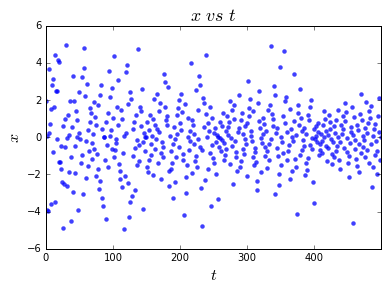

In [22]:
# On peut voir que hyperopt va tester des valeurs de plus en plus centrée autour de l'optimal préssenti
from matplotlib import pyplot as plt
%matplotlib inline
f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials] # tid est l'id du step que l'on retrouve dans trials
ys = [t['misc']['vals']['x'] for t in trials.trials] # la valeur x évaluée pour le step en question
ax.set_xlim(xs[0], xs[-1])
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

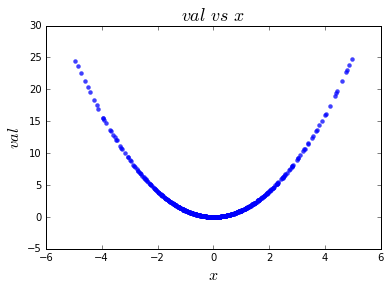

In [23]:
# On peut aussi afficher la valeur de l'erreur en fonction des x
f, ax = plt.subplots(1)
xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)